In [85]:
import pandas as pd
import numpy as np
from scipy import stats

CORE_COLUMNS = ['CMTE_NM','RPT_TP','NAME','CITY','STATE','ZIP_CODE','TRANSACTION_DT','TRANSACTION_AMT','PURPOSE','CATEGORY']

# Read in data
df_header = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp_header_file.csv")
df = pd.read_csv("../oppexp16/oppexp.txt", delimiter="|", low_memory=False, names=df_header.columns, index_col=False)
cmte_header = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm_header_file.csv") # pull in header for committee names file
cmte_names = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm.txt", delimiter="|", names=cmte_header.columns) # pull in committee names file

# Clean data
df = ( df.set_index('CMTE_ID') ).join(cmte_names.set_index('CMTE_ID')) 
df = df.reset_index()

In [86]:
df = df.drop([1660030,1660053,170519,170520])
#df['TRANSACTION_DT']=pd.to_datetime(df['TRANSACTION_DT'])
df['TRANSACTION_DT'].sort_values().dropna()

799105     01/01/2012
153470     01/01/2015
319559     01/01/2015
319560     01/01/2015
319561     01/01/2015
              ...    
220816     12/31/2016
183124     12/31/2016
1411229    12/31/2016
609425     12/31/2016
864568     12/31/2017
Name: TRANSACTION_DT, Length: 1754943, dtype: object

In [88]:
df['TRANSACTION_DT']=pd.to_datetime(df['TRANSACTION_DT'],errors = 'coerce')

In [89]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000422,N,2015,M8,201508119000814199,21B,F3X,SB,PAYMENTECH,SALEM,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
1,C00000422,N,2015,M8,201508119000814199,21B,F3X,SB,FIRST NATIONAL MERCHANT SOLUTIONS,OMAHA,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
2,C00000422,N,2015,M9,201509109001633191,21B,F3X,SB,CHASE PAYMENTECH,SALEM,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
3,C00000422,N,2015,M7,201507149000106216,21B,F3X,SB,FIRST NATIONAL MERCHANT SOLUTIONS,OMAHA,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
4,C00000422,N,2015,YE,201601139004480408,21B,F3X,SB,CHASE PAYMENTECH,SALEM,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN


In [32]:
names = df.CMTE_NM.unique()
names

array(['AMERICAN MEDICAL ASSOCIATION POLITICAL ACTION COMMITTEE',
       'D R I V E POLITICAL FUND CHAPTER 886',
       'INDIANA STATE MEDICAL ASSOCIATION POLITICAL ACTION COMMITTEE',
       ..., 'DEMOCRACY LEGACY', 'MONTGOMERY COUNTY REPUBLICAN PARTY ',
       'AMERICAN POLITICAL ACTION COMMITTEE'], dtype=object)

In [56]:
candidates = ['trump','cruz','kasich','rubio','carson','bush','paul','christie','huckabee','fiorina','gilmore','santorum','perry','walker','jindal','graham','pataki']
cmte_names = df.CMTE_NM.unique()
    
for candidate in candidates:
    for name in cmte_names:
        if candidate.upper() in str(name):
            print(name)

DONALD J. TRUMP FOR PRESIDENT, INC.
TRUMP MAKE AMERICA GREAT AGAIN COMMITTEE
TRUMP VICTORY
DEMOCRATIC PARTY OF SANTA CRUZ COUNTY
TED CRUZ FOR SENATE
TED CRUZ VICTORY COMMITTEE
SANTA CRUZ COUNTY REPUBLICAN CENTRAL COMMITTEE
CRUZ FOR PRESIDENT
KASICH FOR AMERICA, INC.
MARCO RUBIO FOR PRESIDENT
RUBIO VICTORY COMMITTEE
MARCO RUBIO FOR SENATE
ANDRE CARSON FOR CONGRESS
CARSON AMERICA
FRIENDS OF ERIK PAULSEN
PAUL TONKO FOR CONGRESS
PAUL GOSAR FOR CONGRESS
RON PAUL 2012 PRESIDENTIAL CAMPAIGN COMMITTEE INC.
RAND PAUL FOR US SENATE
PROGRESSIVES ADVANCING UNITED LEADERSHIP (PAULPAC)
PAUL COOK FOR CONGRESS
PAULA OVERBY FOR CONGRESS
FRIENDS OF PAUL HOLLIS LLC
PAUL CHABOT CONGRESS
PAUL SPAIN FOR CONGRESS
FRIENDS OF PAUL MITCHELL
PAUL BROUN COMMITTEE
GILMORE FOR AMERICA LLC
RICK SANTORUM FOR PRESIDENT, INC. (2012)
SANTORUM FOR PRESIDENT 2016
PERRY HANEY FOR CONGRESS
PATRIOTS FOR PERRY
JONES WALKER L.L.P. POLITICAL ACTION COMMITTEE
WALKER 4 NC
SCOTT WALKER INC
TEAM GRAHAM, INC.
MALCOLM GRAHAM FOR CONG

In [59]:
pres_cmtes = ['DONALD J. TRUMP FOR PRESIDENT, INC.','CRUZ FOR PRESIDENT','KASICH FOR AMERICA, INC.','MARCO RUBIO FOR PRESIDENT','CARSON AMERICA','GILMORE FOR AMERICA LLC','SANTORUM FOR PRESIDENT 2016','PATAKI FOR PRESIDENT INC']
pres_cmtes

['DONALD J. TRUMP FOR PRESIDENT, INC.',
 'CRUZ FOR PRESIDENT',
 'KASICH FOR AMERICA, INC.',
 'MARCO RUBIO FOR PRESIDENT',
 'CARSON AMERICA',
 'GILMORE FOR AMERICA LLC',
 'SANTORUM FOR PRESIDENT 2016',
 'PATAKI FOR PRESIDENT INC']

In [109]:
from datetime import datetime
FINAL_PRIMARY_DT = "June 7, 2016"
final_primary = datetime.strptime(FINAL_PRIMARY_DT, '%B %d, %Y')

In [110]:
good_dates = df[df.TRANSACTION_DT.apply(lambda x: x<=final_primary) ]


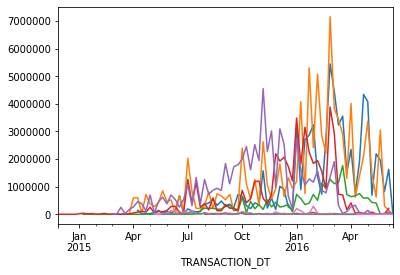

In [111]:
for cmte in pres_cmtes: 
    good_dates[good_dates.CMTE_NM==cmte].groupby([pd.Grouper(key='TRANSACTION_DT', freq='W-MON')])['TRANSACTION_AMT']\
       .sum().plot()

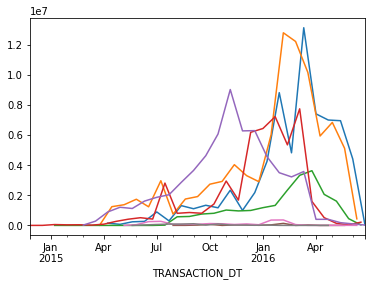

In [113]:
# Grouped by 3 week intervals
for cmte in pres_cmtes: 
    good_dates[good_dates.CMTE_NM==cmte].groupby([pd.Grouper(key='TRANSACTION_DT', freq='3W-MON')])['TRANSACTION_AMT']\
       .sum().plot()

In [117]:
#DBScan
#source: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit_predict(X)
#clustering.labels_

clustering 

array([ 0,  0,  0,  1,  1, -1], dtype=int64)

In [129]:
df.head()

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
0,C00000422,N,2015,M8,201508119000814199,21B,F3X,SB,PAYMENTECH,SALEM,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
1,C00000422,N,2015,M8,201508119000814199,21B,F3X,SB,FIRST NATIONAL MERCHANT SOLUTIONS,OMAHA,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
2,C00000422,N,2015,M9,201509109001633191,21B,F3X,SB,CHASE PAYMENTECH,SALEM,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
3,C00000422,N,2015,M7,201507149000106216,21B,F3X,SB,FIRST NATIONAL MERCHANT SOLUTIONS,OMAHA,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN
4,C00000422,N,2015,YE,201601139004480408,21B,F3X,SB,CHASE PAYMENTECH,SALEM,...,WASHINGTON,DC,200017400,B,Q,NaN,M,M,DELAWARE MEDICAL PAC,NaN


In [131]:
dummies = pd.get_dummies(df,sparse=True)

In [134]:
dummies.iloc[0,:]

RPT_YR                              2015
IMAGE_NUM             201508119000814199
TRANSACTION_DT       2015-07-31 00:00:00
TRANSACTION_AMT                   266.77
SUB_ID               4081220151248555500
                            ...         
CAND_ID_S8WA00194                      0
CAND_ID_S8WA00228                      0
CAND_ID_S8WI00026                      0
CAND_ID_S8WV00127                      0
CAND_ID_S8WV00143                      0
Name: 0, Length: 1987656, dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ageAndFare = scaler.fit_transform(ageAndFare)

In [127]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=3, min_samples=2).fit_predict(df.iloc[:,1:])
#clustering.labels_

clustering 

ValueError: could not convert string to float: 'N'

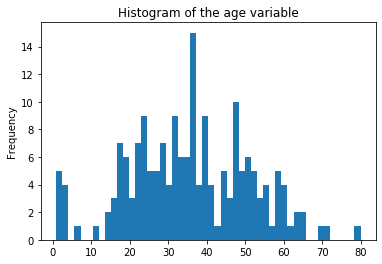

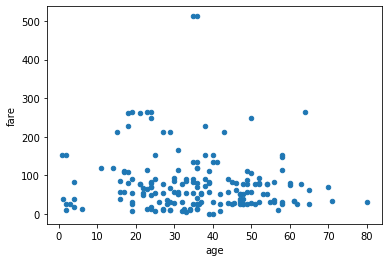

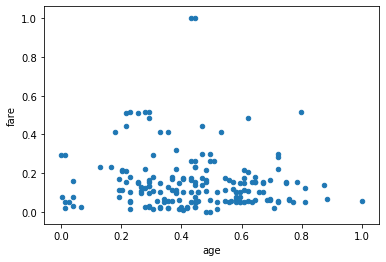

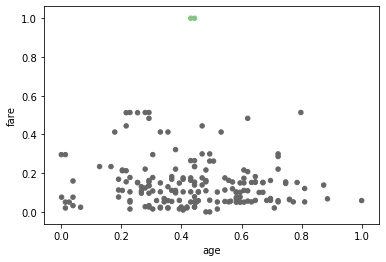

In [125]:
#source: https://www.mikulskibartosz.name/outlier-detection-with-scikit-learn/

import seaborn as sns
import pandas as pd
titanic = sns.load_dataset('titanic')
titanic = titanic.copy()
titanic = titanic.dropna()
titanic['age'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable"
)

from scipy.stats import zscore
titanic["age_zscore"] = zscore(titanic["age"])
titanic["is_outlier"] = titanic["age_zscore"].apply(
  lambda x: x <= -2.5 or x >= 2.5
)
titanic[titanic["is_outlier"]]

ageAndFare = titanic[["age", "fare"]]
ageAndFare.plot.scatter(x = "age", y = "fare")

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ageAndFare = scaler.fit_transform(ageAndFare)
ageAndFare = pd.DataFrame(ageAndFare, columns = ["age", "fare"])
ageAndFare.plot.scatter(x = "age", y = "fare")

from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(
  eps = 0.5,
  metric="euclidean",
  min_samples = 3,
  n_jobs = -1)
clusters = outlier_detection.fit_predict(ageAndFare)

clusters

from matplotlib import cm
cmap = cm.get_cmap('Accent')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)

In [4]:

# Get committee id from committee name
cmte_name = "GILLIBRAND 2020" #"WARREN FOR PRESIDENT, INC." #INPUT
cmte_data = cmte_names[cmte_names['CMTE_NM']==cmte_name].copy()
cmte_id = cmte_data['CMTE_ID'].values[0]
print(cmte_name, "ID:", cmte_id)

# Committee-level data
cmte = df[df.index==cmte_id].copy()
pos_cmte = cmte[cmte['TRANSACTION_AMT']>0]
gpd_pos_cmte = pos_cmte.groupby('PURPOSE')
cats_paid = gpd_pos_cmte['TRANSACTION_AMT'].sum().sort_values(ascending=False)
top_cats = cats_paid.index[:3]
print('Top categories:',top_cats.values)

# Detect outliers
outliers = pd.DataFrame()
for cat in top_cats:
    cmte_cat = cmte[cmte['PURPOSE']==cat].copy()
    outliers = outliers.append(cmte_cat[np.abs(stats.zscore(cmte_cat['TRANSACTION_AMT'])) > 3])
    
print(len(outliers))
print(outliers['PURPOSE'].value_counts())
outliers[CORE_COLUMNS]

GILLIBRAND 2020 ID: C00694018
Top categories: ['CREDIT CARD - SEE BELOW IF ITEMIZED' 'COMMUNICATIONS CONSULTING'
 'ADVERTISING']
2
ADVERTISING    2
Name: PURPOSE, dtype: int64


,CMTE_NM,RPT_TP,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,PURPOSE,CATEGORY
CMTE_ID,,,,,,,,,,
C00694018,GILLIBRAND 2020,Q2,TWITTER,PHILADELPHIA,PA,191700001,6/12/2019,23590.37,ADVERTISING,NaN
C00694018,GILLIBRAND 2020,Q2,GOOGLE,MOUNTAIN VIEW,CA,940431351,6/12/2019,67148.93,ADVERTISING,NaN


In [5]:
import os
os.getcwd() 

'C:\\Users\\Brandon\\Documents\\Insight\\Data - Insight\\oppexp20'